# Ravelry Yarn Analysis

In [60]:
import requests
from requests.auth import HTTPBasicAuth
import time

In [4]:

!pip install pandas
import pandas as pd


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [5]:
!pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [6]:
!pip install dotenv
import os
from dotenv import load_dotenv

load_dotenv()

CLIENT_ID = os.getenv("CLIENT_ID")
CLIENT_SECRET = os.getenv("CLIENT_SECRET")


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [23]:
!pip install seaborn
import seaborn as sns


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


# Data Retrieval

This project looks at attributes of popular yarns for a better understanding of what makes a yarn well-loved by knitters and crocheters. The data is from Ravelry, a platform for fiber artists to log their projects, tools, and patterns to share with a community of over 10 million users.

As of March 2025 there are 290,287 different types of yarn listed on Ravelry. To see what makes a yarn popular, I narrowed it down to the 200 most popular yarns, with popularity determined by the number of projects created using that yarn. By analyzing characteristics such as brand, fiber content, weight, and yardage, this project aims to gain clarity on what fiber artists look for when they shop for yarn.

In [7]:
yarns = []
page = 1

while True:
  yarn_response = requests.get("https://api.ravelry.com/yarns/search.json",
                               params={"page":page},
                               auth=HTTPBasicAuth(CLIENT_ID, CLIENT_SECRET))
  yarn_response_json = yarn_response.json()
  y = yarn_response_json.get("yarns", [])
  yarns.extend(y)

  if page >= 4: # Get the 200 most popular yarns
    break

  page +=1

yarns = pd.DataFrame(yarns)
yarns.head()

,discontinued,gauge_divisor,grams,id,machine_washable,max_gauge,min_gauge,name,permalink,rating_average,rating_count,rating_total,texture,thread_size,wpi,yardage,yarn_company_name,first_photo,personal_attributes,yarn_weight
0,False,4.0,198,2059,True,NaN,17.0,Super Saver (Solids),red-heart-super-saver-solids,3.60,18458,66380,cable plied,None,NaN,364,Red Heart,"{'id': 105754997, 'sort_order': 1, 'user_id': ...",None,"{'crochet_gauge': '', 'id': 1, 'knit_gauge': '..."
1,False,4.0,170,3330,True,NaN,18.0,Simply Soft Solids,caron-simply-soft-solids,4.04,19857,80166,plied,None,NaN,315,Caron,"{'id': 101659175, 'sort_order': 1, 'user_id': ...",None,"{'crochet_gauge': '', 'id': 1, 'knit_gauge': '..."
2,False,4.0,100,523,None,20.0,18.0,Cascade 220®,cascade-yarns-cascade-220,4.49,22399,100565,plied,None,9.0,220,Cascade Yarns ®,"{'id': 92533800, 'sort_order': 1, 'user_id': 2...",None,"{'crochet_gauge': None, 'id': 12, 'knit_gauge'..."
3,False,4.0,100,62569,True,22.0,18.0,Rios,malabrigo-yarn-rios,4.82,23818,114716,plied,None,NaN,210,Malabrigo Yarn,"{'id': 13248231, 'sort_order': 1, 'user_id': 1...",None,"{'crochet_gauge': None, 'id': 12, 'knit_gauge'..."
4,False,4.0,100,5741,True,NaN,16.0,Vanna's Choice,lion-brand-vannas-choice,3.87,14123,54701,plied,None,NaN,170,Lion Brand,"{'id': 116466285, 'sort_order': 1, 'user_id': ...",None,"{'crochet_gauge': '', 'id': 1, 'knit_gauge': '..."


# Brand Analysis

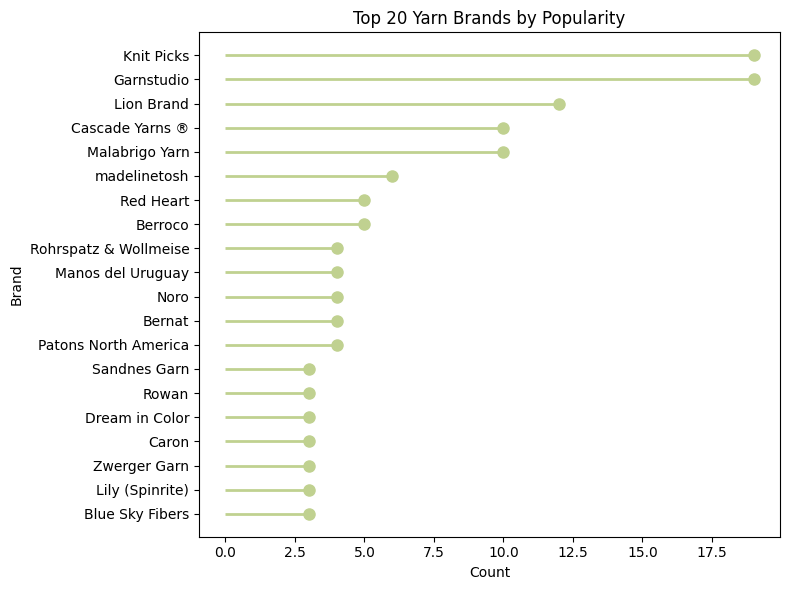

In [10]:
brand_count = yarns["yarn_company_name"].value_counts().head(20)
brands = brand_count.index
counts = brand_count.values

plt.figure(figsize=(8, 6))
plt.hlines(y=brands, xmin=0, xmax=counts, color="#c0d190", linewidth=2)
plt.plot(counts, brands, "o", color="#c0d190", markersize=8)

plt.title("Top 20 Yarn Brands by Popularity")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Garnstudio and Knit Picks are tied for first place in producing the most popular yarns. Garnstudio, a Norwegian company, is best known for its Drops yarn lines, which offers a wide range of fiber options at very affordable prices. Knit Picks, based in the United States, is similarly known for providing high-quality yarn at relatively accessible price points.

Following closely is Lion Brand, another U.S.-based company offering affordable yarn options. Unlike Garnstudio and Knit Picks, Lion Brand is widely available in large retailers and craft stores across the U.S., making it especially appealing to shoppers who prefer buying yarn in person. That said, with the rise of online shopping, physical availability is becoming less of a barrier for brands with a more limited physical presence in retail stores.

What stands out across the top three brands is their affordability. Making larger projects like blankets or sweaters often takes a significant amount of yarn, so cost becomes an important factor. These brands seem to strike a compelling balance between quality and price, making them attractive choices for fiber artists seeking value without sacrificing quality.

# Status of Production

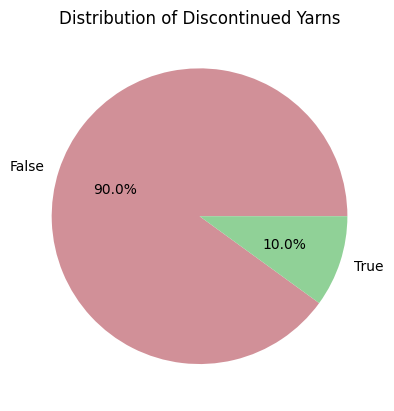

In [11]:
discontinued_count = yarns["discontinued"].value_counts()
colors = ["#d19098", "#90d197"]
discontinued_count.plot.pie(colors=colors, autopct='%1.1f%%')
plt.title("Distribution of Discontinued Yarns")
plt.ylabel('')
plt.show()

This pie chart shows the proportion of discontinued yarns. 90% of the 200 most popular yarns are still available and in production, suggesting that once a yarn gains strong popularity, it tends to stay on the market. While there are some exceptions, this suggests that popular yarn lines maintain a consistently high demand over time, achieving strong product longevity. Let's take a look at the yarn lines that were discontinued despite their popularity.

In [12]:
yarns[yarns["discontinued"] == True]

,discontinued,gauge_divisor,grams,id,machine_washable,max_gauge,min_gauge,name,permalink,rating_average,rating_count,rating_total,texture,thread_size,wpi,yardage,yarn_company_name,first_photo,personal_attributes,yarn_weight
42,True,4.0,100,723,None,NaN,20.0,Classic Wool Merino,patons-north-america-classic-wool-merino,4.16,6763,28155,plied,None,NaN,223,Patons North America,"{'id': 92247707, 'sort_order': 1, 'user_id': 2...",None,"{'crochet_gauge': None, 'id': 12, 'knit_gauge'..."
50,True,4.0,70,12037,True,NaN,16.0,Peaches & Creme Solids,pisgah-yarn--dyeing-co-peaches--creme-solids,4.24,4583,19422,"4 single plies, S-plied, non-mercerized",None,NaN,120,Pisgah Yarn & Dyeing Co.,"{'id': 1989067, 'sort_order': 1, 'user_id': 53...",None,"{'crochet_gauge': None, 'id': 12, 'knit_gauge'..."
64,True,4.0,100,3374,True,NaN,17.0,Cotton-Ease 50/50,lion-brand-cotton-ease-50-50,4.12,6143,25303,plied,None,NaN,207,Lion Brand,"{'id': 11661238, 'sort_order': 1, 'user_id': 1...",None,"{'crochet_gauge': '', 'id': 1, 'knit_gauge': '..."
82,True,4.0,100,842,True,NaN,18.0,Satin Solids,bernat-satin-solids,3.85,4324,16645,plied,None,NaN,200,Bernat,"{'id': 92657479, 'sort_order': 1, 'user_id': 9...",None,"{'crochet_gauge': '', 'id': 1, 'knit_gauge': '..."
84,True,4.0,56,3744,True,20.0,16.0,Peaches & Creme Ombres,pisgah-yarn--dyeing-co-peaches--creme-ombres,4.30,3389,14578,"4 single plies, S-plied, non-mercerized",None,NaN,98,Pisgah Yarn & Dyeing Co.,"{'id': 10253429, 'sort_order': 1, 'user_id': 2...",None,"{'crochet_gauge': '', 'id': 1, 'knit_gauge': '..."
86,True,4.0,100,1240,True,NaN,28.0,Shepherd Sock Multi,lornas-laces-shepherd-sock-multi,4.54,5966,27101,plied,None,NaN,430,Lorna's Laces,"{'id': 105405, 'sort_order': 1, 'user_id': 126...",None,"{'crochet_gauge': '', 'id': 5, 'knit_gauge': '..."
90,True,4.0,113,5833,True,NaN,30.0,Smooshy 100% Merino,dream-in-color-smooshy-100-merino,4.57,5817,26610,plied,None,NaN,450,Dream in Color,"{'id': 83023903, 'sort_order': 1, 'user_id': 2...",None,"{'crochet_gauge': '', 'id': 5, 'knit_gauge': '..."
99,True,4.0,50,5272,True,32.0,28.0,4-fädig Color,regia-4-fadig-color,4.33,4383,18992,plied,None,NaN,230,Regia,"{'id': 39146, 'sort_order': 1, 'user_id': 819,...",None,"{'crochet_gauge': None, 'id': 13, 'knit_gauge'..."
114,True,4.0,100,106703,True,NaN,32.0,Woolike,loops--threads-woolike,4.26,2442,10413,plied,None,NaN,678,Loops & Threads,"{'id': 68462815, 'sort_order': 1, 'user_id': 3...",None,"{'crochet_gauge': None, 'id': 13, 'knit_gauge'..."
123,True,4.0,50,42719,True,NaN,32.0,Serenity Sock Prints,premier-yarns-serenity-sock-prints,4.05,3589,14519,plied,None,NaN,230,Premier Yarns,"{'id': 87659606, 'sort_order': 1, 'user_id': 8...",None,"{'crochet_gauge': None, 'id': 13, 'knit_gauge'..."


The discontinued yarns all rank fairly low on the list of 200 most popular yarns, with the highest ranking yarn line at spot 42. This supports the idea that a yarn's popularity impacts its likelihood of getting discontinued, as most of the discontinued yarns were closer to the bottom of the popularity ranks.

# Fiber Content

In [13]:
def get_fiber(id):
  url = f"https://api.ravelry.com/yarns/{id}.json"
  try:
    r = requests.get(url, auth=HTTPBasicAuth(CLIENT_ID, CLIENT_SECRET))
    if r.status_code == 200:
      rj = r.json()
      f = rj.get("yarn", {}).get("yarn_fibers", [])
      fiberlist = [
          f"{fiber.get('percentage', 0)}% {fiber.get('fiber_type', {}).get('name', '')}"
          for fiber in f if fiber.get("fiber_type")
      ]
      return ", ".join(fiberlist) if fiberlist else "Unknown"
    else:
      return None
  except:
    return None

fiber_content = []
for id in yarns["id"]:
  fiber_content.append(get_fiber(id))
  time.sleep(0.5)

In [14]:
yarns["fiber_content"] = fiber_content

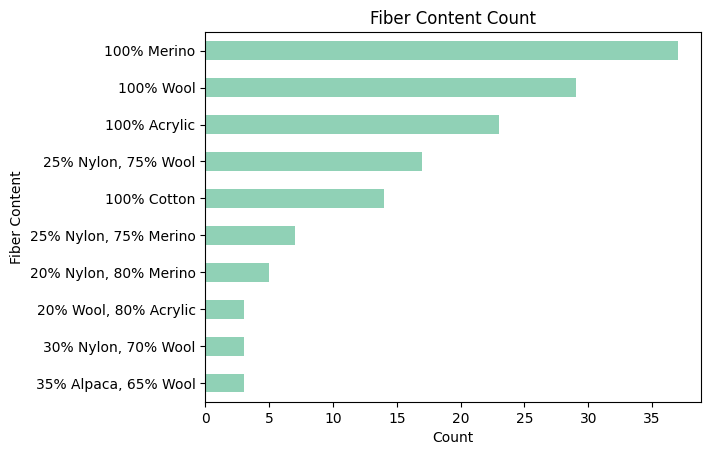

In [15]:
fiber_count = yarns["fiber_content"].value_counts().head(10)
fiber_count.plot(kind="barh", color="#90d1b6")

plt.title("Fiber Content Count")
plt.xlabel("Count")
plt.ylabel("Fiber Content")
plt.gca().invert_yaxis()
plt.show()

This chart highlights the most commonly used fiber compositions in yarns. 100% Merino stands out as the most frequent fiber content, reflecting its popularity for softness and warmth. 100% Wool and 100% Acrylic follow closely, suggesting a strong preference for single-fiber yarns, either natural or synthetic. The fourth most common, a 25% Nylon / 75% Wool blend, indicates a demand for durability in addition to warmth. This blend is often used in sock yarns, which might explain why it's the most represented blend. The least common blends, such as 35% Alpaca / 65% Wool and 30% Silk / 70% Mohair, could be more niche due to cost or specialized use. Overall, this suggests that people have a preference towards single-fiber yarns, but blends containing nylon are also popular due to the added durability.

# Textures

"Ply" often refers to the number of individual strands that make up the yarn. For example, 2-ply would mean that the yarn is made up of 2 separate strands twisted together to form one strand of yarn. 4-ply means that the yarn is made up of 4 separate strands twisted together. A look into the the yarn texture shows that the yarns on Ravelry are classified more generally as "plied" or "singles", the latter meaning that it is made of just one strand of yarn. However, it looks like "plied" shows up multiple times formatted differently. The graph below shows the texture counts after a quick data reformatting and cleaning.

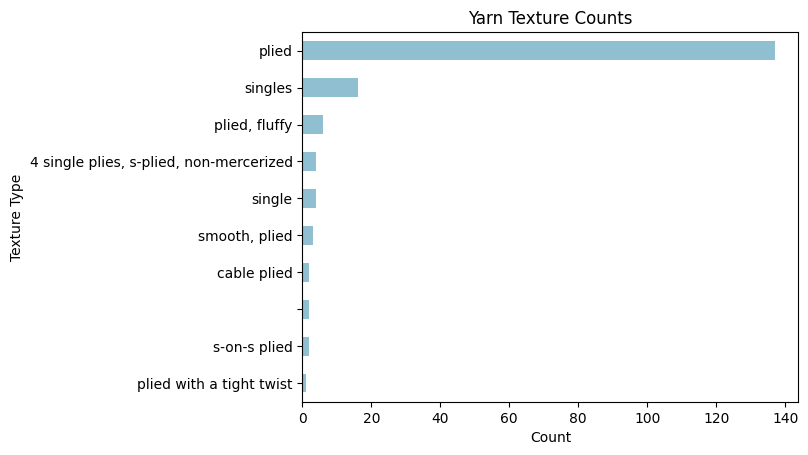

In [17]:
yarns["texture_clean"] = yarns["texture"].str.strip().str.lower()
texture_count_c = yarns["texture_clean"].value_counts().head(10)
texture_count_c.plot(kind="barh", color="#90bfd1")
plt.title("Yarn Texture Counts")
plt.xlabel("Count")
plt.ylabel("Texture Type")
plt.gca().invert_yaxis()
plt.show()

A large majority of popular yarn lines are plied, which makes sense considering that plied yarn is more durable than yarn that has just one strand. Single-ply yarn is more likely to pill and will most likely show signs of wear and tear much faster than plied yarn. On Ravelry, the exact number of strands isn't usually specified, so we unfortunately don't get a clear insight into exactly how many strands the popular yarn lines have. A look into the thickness of the yarn might offer some ideas.

# Thickness (Weight)

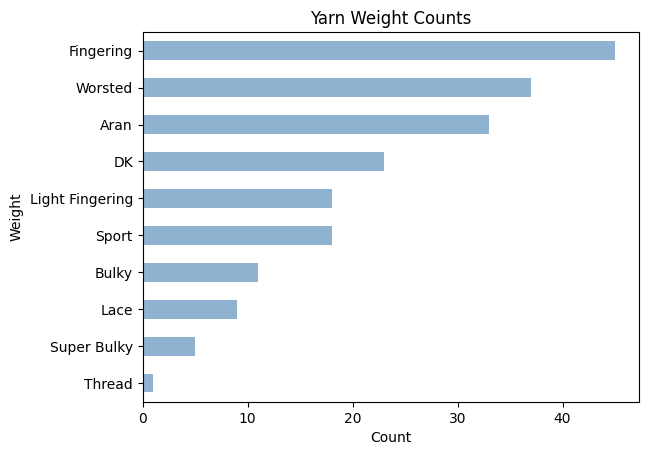

In [18]:
yarns["weight_name"] = yarns["yarn_weight"].apply(lambda x: x.get("name") if isinstance(x,dict) else None)
weight_count = yarns["weight_name"].value_counts()

weight_count.plot(kind="barh", color="#90b2d1")
plt.title("Yarn Weight Counts")
plt.xlabel("Count")
plt.ylabel("Weight")
plt.gca().invert_yaxis()
plt.show()

Yarn weight refers to the thickness of the strand, which affects the drape, texture, and type of project it's best suited for. From thinnest to thickest, the most common yarn weight classifications are:

1. Thread
2. Lace
3. Light Fingering
4. Fingering
5. Sport
6. DK
7. Worsted
8. Aran
9. Bulky
10. Super Bulky

The most commonly seen weight of yarn is fingering, which is also known as sock weight. Despite the name, it can be used for things other than socks and is often used for lighter garments. The next most commonly seen weight is worsted, which is a medium weight yarn good for sturdier, more durable garments. Aran weight, which is a little thicker than worsted weight, follows closely. This suggests a preference for lighter to medium weight yarns, possibly due to their versatility and suitability for a wider range of projects.

# Amount in Yards

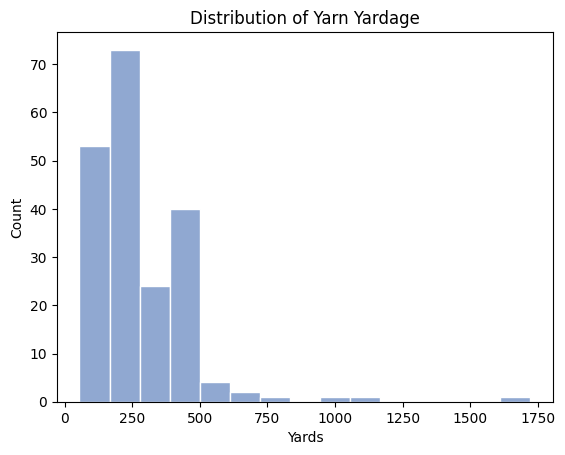

In [19]:
plt.hist(yarns["yardage"], bins=15, color="#90a8d1", edgecolor="white")
plt.title("Distribution of Yarn Yardage")
plt.xlabel("Yards")
plt.ylabel("Count")
plt.show()

Next we take a look at the yardage of the yarn. Yardage often depends heavily on the weight (or thickness) of the yarn, with thinner yarns usually having higher yardages than thicker yarns. For example, a 50g ball of a thinner yarn (such as fingering weight) will most likely have a higher yardage than a 50g ball of a thicker yarn (such as aran weight). From the chart, we can see that most of the popular yarns come in smaller balls, with the majority containing under 250 yards. There's a sharp drop-off after that, with very few yarns exceeding 500 yards per ball. This suggests that standard skein sizes for popular yarns tend to be smaller, possibly to make them more accessible for smaller projects or for projects that use multiple colors.

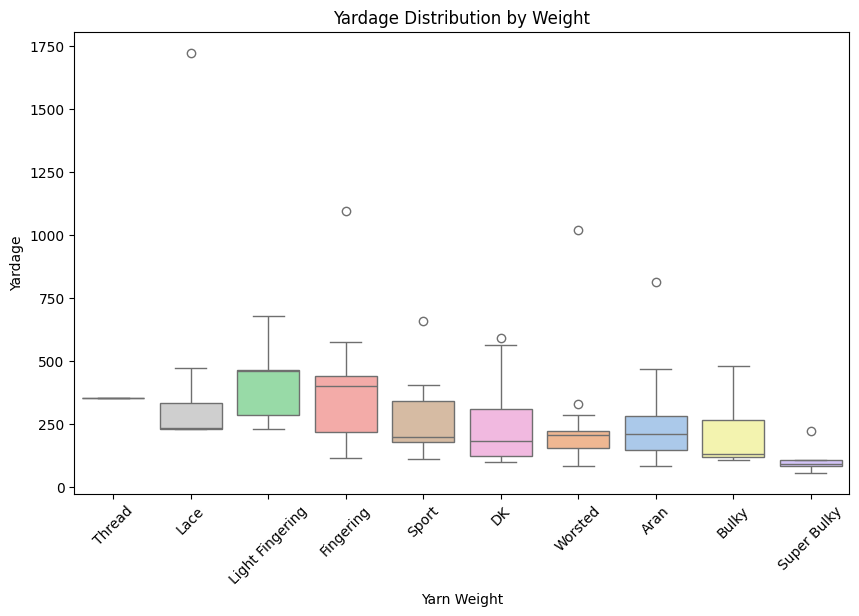

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=yarns, 
    x="weight_name", 
    y="yardage",
    hue="weight_name",
    palette="pastel",
    legend=False,
    order=["Thread", "Lace", "Light Fingering", "Fingering", "Sport", 
           "DK", "Worsted", "Aran", "Bulky", "Super Bulky"]
)
plt.title("Yardage Distribution by Weight")
plt.xlabel("Yarn Weight")
plt.ylabel("Yardage")
plt.xticks(rotation=45)
plt.tight_layout
plt.show()

This boxplot shows the distribution of yardage across different yarn weights. As expected, thinner yarns like Light Fingering and Fingering tend to have higher yardage per skein, while thicker yarns like Bulky and Super Bulky have lower yardage. The spread of yardage is largest in the lighter weights, with several outliers containing over 1,000 yards. In contrast, weights like Aran and Bulky show tighter distributions centered around 200–300 yards. Overall, this aligns with standard industry packaging: lighter yarns cover more distance per gram, while thicker yarns are shorter but denser.

# Machine Washability

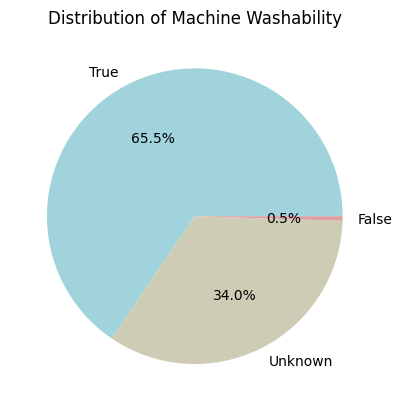

In [21]:
wash_count = yarns["machine_washable"].fillna("Unknown").value_counts()
colors = ["#a0d3db", "#cfccb6", "#dba0a1"]

wash_count.plot.pie(colors=colors, autopct="%1.1f%%")

plt.title("Distribution of Machine Washability")
plt.ylabel("")
plt.show()

Nobody wants to spend hours making a hat or sweater, only for it to shrink or get ruined after tossing it in the washing machine. Hand-washing garments is a hassle, so it's not surprising to see that over 65% of the most used yarns can be machine washed. 34% of yarn lines don't specify whether they can be machine washed or not. It's safer to assume that the 34% unspecified yarns should be washed by hand to avoid any unwanted accidents. Only 0.5% of the most used yarns specify explicitly that it cannot be machine washed. Overall, this suggests that ease of care plays a significant role in a yarn's popularity, with machine washability being a strong point in favor of everyday usability.

# User Ratings

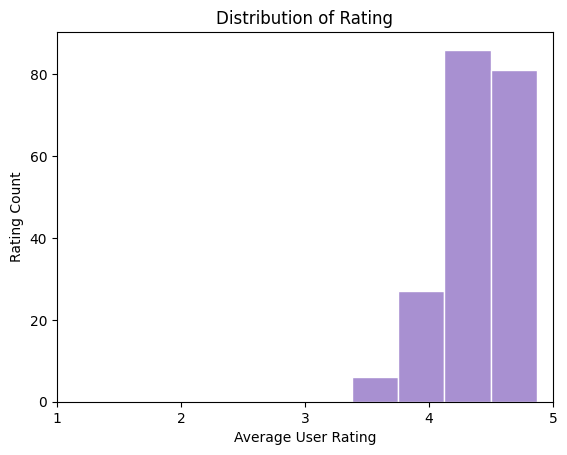

In [22]:
plt.hist(yarns["rating_average"], bins=4, color="#a890d1", edgecolor="white")
plt.title("Distribution of Rating")
plt.xlabel("Average User Rating")
plt.xticks([1,2,3,4,5])
plt.ylabel("Rating Count")
plt.show()

It's not surprising to see that all of the 200 most popular yarns have positive ratings on average. Every yarn line here is rated 3 or higher out of 5, with the vast majority scoring above 4 out of 5. This indicates that users are generally satisfied with these yarn lines and use them because they genuinely enjoy working with them, rather than using them out of necessity due to a lack of other available options or otherwise.

# Summary

This analysis took a look into the traits of the 200 most popular yarns on Ravelry, using a combination of data cleaning, visualization, and exploratory analysis to explore trends in well-loved yarns. Some of the traits analyzed include brand, fiber content, weight, texture, and washability.

From a data perspective, this analysis required some cleaning of text-based fields (such as textures and fiber types) and thoughtful binning of continuous variables like yardage and weight.

Some of the key patterns and findings are:

- Affordability and accessibility play a major role in yarn popularity, as seen in brands like Garnstudio (Drops), Knit Picks, and Lion Brand.

- Plied, fingering-weight yarns are among the most popular yarn types, likely due to their versatility and durability.

- Most popular yarns are machine washable, showing that crafters value ease of care for their finished projects.

- Popular yarn lines receive consistently high ratings, suggesting that makers return to them by choice, not necessity.

- Discontinued yarns rarely appear high on the list, reinforcing the idea that popularity helps keep a yarn line alive.

While this analysis offers a look into what makes a yarn popular, additional factors such as color range, regional availability, and softness might influence a yarn's popularity. An interesting future addition might be sentiment analysis based on comments about specific yarn lines.

Some adjacent project ideas can include analyzing trending patterns on Ravelry to see what makes a pattern popular, and to determine what fiber artists look for in a pattern or project. A predictive model can be made to predict a yarn or pattern's popularity among Ravelry users.